Чтобы оптимизировать производственные расходы, металлургический комбинат решил уменьшить потребление электроэнергии на этапе обработки стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

## Исследовательский Анализ.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns

In [2]:
arc = pd.read_csv('/datasets/final_steel/data_arc.csv', parse_dates=['Начало нагрева дугой', 'Конец нагрева дугой'])
bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv', parse_dates=['Bulk 1','Bulk 2', 'Bulk 3',
                                                                                'Bulk 4','Bulk 5','Bulk 6',
                                                                                'Bulk 7', 'Bulk 8','Bulk 9',
                                                                                'Bulk 10','Bulk 11','Bulk 12',
                                                                                'Bulk 13','Bulk 14','Bulk 15'])
gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
temp = pd.read_csv('/datasets/final_steel/data_temp.csv', parse_dates=['Время замера'])
wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv', parse_dates=['Wire 1','Wire 2', 'Wire 3',
                                                                                'Wire 4','Wire 5','Wire 6',
                                                                                'Wire 7', 'Wire 8','Wire 9'])

In [3]:
display(arc.sample(10))
arc.info() #Данные о нагреве электродами

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
1776,385,2019-05-17 20:36:11,2019-05-17 20:38:22,0.499726,0.425789
10082,2185,2019-07-26 04:24:54,2019-07-26 04:28:57,1.127781,0.770059
4424,952,2019-06-07 14:33:20,2019-06-07 14:36:26,0.839046,0.578283
10395,2260,2019-07-28 14:11:42,2019-07-28 14:16:42,1.163629,1.306848
2397,517,2019-05-22 14:54:03,2019-05-22 14:58:04,1.058071,0.765111
4724,1021,2019-06-09 19:52:10,2019-06-09 19:53:58,0.362008,0.250217
780,167,2019-05-09 14:52:13,2019-05-09 14:55:23,0.640258,0.405216
11838,2572,2019-08-08 20:41:27,2019-08-08 20:41:52,0.085896,0.053348
1477,319,2019-05-15 05:57:00,2019-05-15 06:01:05,0.731231,1.227999
11859,2576,2019-08-08 23:48:46,2019-08-08 23:52:47,0.881836,0.614032


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null datetime64[ns]
Конец нагрева дугой     14876 non-null datetime64[ns]
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [4]:
arc['Время нагрева'] = arc['Конец нагрева дугой']-arc['Начало нагрева дугой']

In [5]:
#Время нагрева 
arc['Время нагрева']=arc['Время нагрева'] / np.timedelta64(1, 's')

In [6]:
#соотношение мощности
arc['Акстивная/Реактивная']=arc['Активная мощность'] / arc['Реактивная мощность']

Создали вспомогательные показатели: Время нагрева и соотношение активной мощности к реактивной - пригодиться для признаков.

In [7]:
display(bulk.sample(5))
bulk.info() #данные о подаче сыпучих материалов (объём)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
55,64,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,23.0,103.0,NaN,101.0,206.0
175,190,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,910,NaN,NaN,302.0,NaN,NaN,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,NaN
1513,1571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,97.0,104.0
2673,2774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,206.0,NaN,120.0,108.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null float64
Bulk 2     22 non-null float64
Bulk 3     1298 non-null float64
Bulk 4     1014 non-null float64
Bulk 5     77 non-null float64
Bulk 6     576 non-null float64
Bulk 7     25 non-null float64
Bulk 8     1 non-null float64
Bulk 9     19 non-null float64
Bulk 10    176 non-null float64
Bulk 11    177 non-null float64
Bulk 12    2450 non-null float64
Bulk 13    18 non-null float64
Bulk 14    2806 non-null float64
Bulk 15    2248 non-null float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [8]:
#есть пропуски в данных - заполним 0, т.к. это просто недобавление материалов.
bulk = bulk.fillna(0)

In [9]:
display(bulk_time.sample(5))

bulk_time.info() #данные о подаче сыпучих материалов (Время)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2469,2561,NaT,NaT,NaT,2019-08-08 07:55:24,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-08-08 07:38:24,NaT,2019-08-08 07:38:24,2019-08-08 07:38:24
1642,1702,NaT,NaT,NaT,NaT,NaT,2019-07-03 00:12:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-07-02 23:54:14,NaT
2289,2371,NaT,NaT,NaT,2019-08-01 15:42:21,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-08-01 15:31:17,NaT,2019-08-01 15:31:17,2019-08-01 15:31:17
956,1001,NaT,NaT,2019-06-09 02:01:23,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
331,356,NaT,NaT,2019-05-16 19:15:36,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-16 19:08:39,NaT,2019-05-16 19:08:39,2019-05-16 19:08:39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null datetime64[ns]
Bulk 2     22 non-null datetime64[ns]
Bulk 3     1298 non-null datetime64[ns]
Bulk 4     1014 non-null datetime64[ns]
Bulk 5     77 non-null datetime64[ns]
Bulk 6     576 non-null datetime64[ns]
Bulk 7     25 non-null datetime64[ns]
Bulk 8     1 non-null datetime64[ns]
Bulk 9     19 non-null datetime64[ns]
Bulk 10    176 non-null datetime64[ns]
Bulk 11    177 non-null datetime64[ns]
Bulk 12    2450 non-null datetime64[ns]
Bulk 13    18 non-null datetime64[ns]
Bulk 14    2806 non-null datetime64[ns]
Bulk 15    2248 non-null datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


In [10]:
#есть пропуски в данных - заполним 0, т.к. это просто недобавление материалов.
bulk_time = bulk_time.fillna(0)

In [11]:
display(gas.sample(5)) #данные о продувке сплава газом
gas.info()
gas.describe()

,key,Газ 1
943,946,5.978598
1959,1962,4.473135
1876,1879,9.206219
1895,1898,13.154829
3021,3024,7.867505


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
key      3239 non-null int64
Газ 1    3239 non-null float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [12]:
display(temp.sample(5)) #результаты измерения температуры
temp.info()

,key,Время замера,Температура
3762,748,2019-05-31 03:12:48,1578.0
2200,417,2019-05-18 20:20:53,1570.0
14664,2972,2019-08-23 08:32:41,NaN
13729,2793,2019-08-16 20:07:14,NaN
12148,2475,2019-08-05 06:23:51,1602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null datetime64[ns]
Температура     13006 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


In [13]:
temp['Время между замерами'] = temp.groupby(['key'])['Время замера'].diff()/ np.timedelta64(1, 's')

In [14]:
temp_time_diff = (temp.groupby('key')['Время замера'].max()-temp.groupby('key')['Время замера'].min())/ np.timedelta64(1, 's')

In [15]:
#длительность времени между замерами
temp_time_diff = pd.DataFrame(temp_time_diff)

In [16]:
temp_time_diff.describe()

,Время замера
count,3216.000000
mean,1839.861629
std,1246.950298
min,0.000000
25%,1177.000000
50%,1581.000000
75%,2235.000000
max,23537.000000


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


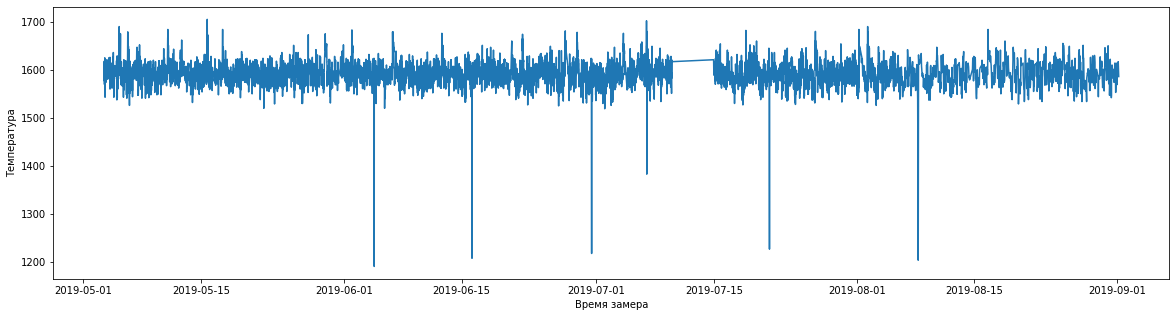

In [17]:
plt.figure(figsize=(20,5))
sns.lineplot(data=temp, x="Время замера", y="Температура")

В данных замечены аномальные значения - возможно выбросы, либо были замеры после простоя когда сплав остыл.

In [18]:
display(temp.loc[temp['Температура'] < 1500])

,key,Время замера,Температура,Время между замерами
4350,867,2019-06-04 14:21:00,1191.0,NaN
5978,1214,2019-06-16 05:32:00,1208.0,NaN
7958,1619,2019-06-30 11:03:54,1218.0,NaN
8913,1818,2019-07-07 00:30:49,1383.0,206.0
8914,1818,2019-07-07 00:31:40,1383.0,51.0
10127,2052,2019-07-21 14:51:40,1227.0,NaN
12564,2561,2019-08-08 07:34:15,1204.0,NaN


In [19]:
display(temp.loc[temp['key'] == 867])

,key,Время замера,Температура,Время между замерами
4350,867,2019-06-04 14:21:00,1191.0,NaN
4351,867,2019-06-04 14:29:35,1575.0,515.0
4352,867,2019-06-04 14:30:29,1576.0,54.0
4353,867,2019-06-04 14:43:10,1571.0,761.0
4354,867,2019-06-04 14:52:54,1600.0,584.0
4355,867,2019-06-04 14:57:17,1599.0,263.0


In [20]:
display(arc.loc[arc['key'] == 867])

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Время нагрева,Акстивная/Реактивная
4028,867,2019-06-04 14:17:51,2019-06-04 14:20:06,0.470265,0.342909,135.0,1.371401
4029,867,2019-06-04 14:33:04,2019-06-04 14:35:39,0.546894,0.401882,155.0,1.360832
4030,867,2019-06-04 14:36:50,2019-06-04 14:37:49,0.217033,0.157679,59.0,1.376423
4031,867,2019-06-04 14:39:23,2019-06-04 14:41:13,0.446139,0.383610,110.0,1.163001
4032,867,2019-06-04 14:44:01,2019-06-04 14:47:10,0.815899,0.591709,189.0,1.378887
4033,867,2019-06-04 14:48:06,2019-06-04 14:52:20,1.133725,0.781918,254.0,1.449929
4034,867,2019-06-04 14:54:19,2019-06-04 14:55:26,0.278104,0.189851,67.0,1.464856


Выборочно посмотрел что это могут быть за выбросы

В данном случае это начальная температура после первого нагрева.

In [21]:
#данные о проволочных материалах (объём)
display(wire.sample(5))
wire.info()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
997,1057,145.033187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1566,1645,103.100396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3012,3171,150.215515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,1888,110.120400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1357,1428,100.105201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null float64
Wire 2    1079 non-null float64
Wire 3    63 non-null float64
Wire 4    14 non-null float64
Wire 5    1 non-null float64
Wire 6    73 non-null float64
Wire 7    11 non-null float64
Wire 8    19 non-null float64
Wire 9    29 non-null float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [22]:
wire = wire.fillna(0) #заменим пропуски нулями - так это сответствует не добавления проволки в сплав.

In [23]:
display(wire_time.sample(10)) #данные о проволочных материалах (время)
wire_time.info()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1280,1349,2019-06-21 02:37:52,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1898,1992,2019-07-19 10:25:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1736,1825,2019-07-07 06:22:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1037,1097,2019-06-12 11:41:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1132,1200,2019-06-15 20:11:56,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
791,845,2019-06-03 17:07:09,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1746,1835,2019-07-07 14:18:34,2019-07-07 14:19:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT
695,738,2019-05-30 14:58:12,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2031,2129,2019-07-24 10:23:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
820,874,2019-06-04 18:58:43,2019-06-04 19:10:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null datetime64[ns]
Wire 2    1079 non-null datetime64[ns]
Wire 3    63 non-null datetime64[ns]
Wire 4    14 non-null datetime64[ns]
Wire 5    1 non-null datetime64[ns]
Wire 6    73 non-null datetime64[ns]
Wire 7    11 non-null datetime64[ns]
Wire 8    19 non-null datetime64[ns]
Wire 9    29 non-null datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [24]:
wire_time = wire_time.fillna(0)

In [25]:
temp_zero = temp.copy()
temp_zero = temp_zero.fillna(0)


In [26]:
zero_key = temp_zero[temp_zero['Температура'] == 0 ]['key']
zero_key_l = zero_key.to_list()
#zero_key_gr = zero_key.drop_duplicates()
#zero_key_gr = pd.DataFrame(zero_key_gr)
#zero_key_gr

In [27]:
temp = temp[~temp['key'].isin(zero_key_l)]

In [28]:
display(temp.tail())

,key,Время замера,Температура,Время между замерами
12262,2498,2019-08-06 02:19:26,1593.0,446.0
12263,2498,2019-08-06 02:25:31,1594.0,365.0
12264,2499,2019-08-06 02:40:25,1569.0,NaN
12265,2499,2019-08-06 02:54:24,1604.0,839.0
12266,2499,2019-08-06 03:00:28,1603.0,364.0


In [29]:
#замена пропусков в данных о температре на медианное.
temp = temp.sort_values(['Время замера'], ascending=True)
#temp['Температура'] = temp['Температура'].fillna(0)
#temp.loc[temp['Температура'] == 0] = temp['Температура'].median()
temp.describe()

,key,Температура,Время между замерами
count,12267.000000,12267.000000,9790.000000
mean,1235.589060,1591.999022,468.949030
std,729.452481,20.833175,481.841655
min,1.000000,1191.000000,3.000000
25%,602.000000,1581.000000,195.250000
50%,1238.000000,1591.000000,384.000000
75%,1874.000000,1601.000000,642.750000
max,2499.000000,1705.000000,14663.000000


## Предобработка данных для создания признаков для модели предсказания конечной температуры.

#### Объединение данных

In [30]:
#последний замер температуры
last_temp = pd.DataFrame(temp.groupby(['key'])['Температура'].last())
last_temp = last_temp.rename(columns={'Температура' : 'Последняя температура'})
#первый замер температуры
first_temp = pd.DataFrame(temp.groupby(['key'])['Температура'].first())
first_temp = first_temp.rename(columns={'Температура' : 'Начальная температура'})
#среднее время между замерами
mean_time = pd.DataFrame(temp.groupby(['key'])['Время между замерами'].mean())

#t0 - время первого замера
#t1 - время последнего замера
time_sample = pd.DataFrame(temp.groupby(['key'])['Время между замерами'].sum())
time_sample = time_sample.rename(columns={'Время между замерами' : 'Время между t1-t0'})
#общее время нагрева
heat_time = pd.DataFrame(arc.groupby(['key'])['Время нагрева'].sum())

#среднее соотношение активной мощности к реактивной
mean_power = pd.DataFrame(arc.groupby(['key'])['Акстивная/Реактивная'].mean())

#общее количество нагревов
count_key = pd.DataFrame(arc.groupby(['key'])['key'].count())
count_key = count_key.rename(columns={'key':'count'})


In [31]:
data_merge = first_temp.merge(last_temp, on='key')

In [32]:
data_merge = data_merge.merge(time_sample, on='key')

In [33]:
data_merge = data_merge.merge(heat_time, on='key')

In [34]:
data_merge = data_merge.merge(mean_power, on='key')

In [35]:
data_merge = data_merge.merge(count_key, on='key')

In [36]:
data_merge = data_merge.merge(mean_time, on='key')

In [37]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 1 to 2499
Data columns (total 7 columns):
Начальная температура    2475 non-null float64
Последняя температура    2475 non-null float64
Время между t1-t0        2475 non-null float64
Время нагрева            2475 non-null float64
Акстивная/Реактивная     2475 non-null float64
count                    2475 non-null int64
Время между замерами     2475 non-null float64
dtypes: float64(6), int64(1)
memory usage: 154.7 KB


In [38]:
data_merge.head()

,Начальная температура,Последняя температура,Время между t1-t0,Время нагрева,Акстивная/Реактивная,count,Время между замерами
key,,,,,,,
1,1571.0,1613.0,861.0,1098.0,1.538898,5,215.25
2,1581.0,1602.0,1305.0,811.0,1.551834,4,261.00
3,1596.0,1599.0,1300.0,655.0,1.583120,5,325.00
4,1601.0,1625.0,388.0,741.0,1.563487,4,194.00
5,1576.0,1602.0,762.0,869.0,1.480428,4,762.00


In [39]:

data_merge.describe()

,Начальная температура,Последняя температура,Время между t1-t0,Время нагрева,Акстивная/Реактивная,count,Время между замерами
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000
mean,1588.402020,1595.336162,1854.953939,799.951919,1.360593,4.625859,486.968404
std,29.243044,16.023153,1301.241764,340.784276,0.130778,1.610087,211.907032
min,1191.000000,1541.000000,234.000000,57.000000,0.687735,1.000000,90.500000
25%,1572.000000,1587.000000,1182.500000,573.000000,1.293966,4.000000,350.350000
50%,1588.000000,1593.000000,1593.000000,772.000000,1.372789,4.000000,448.500000
75%,1605.000000,1599.000000,2262.500000,986.500000,1.440636,6.000000,579.900000
max,1679.000000,1700.000000,23537.000000,4189.000000,1.782164,16.000000,3333.800000


In [40]:
data_merge = data_merge.merge(bulk, on='key')

In [41]:
data_merge = data_merge.merge(gas, on='key')

In [42]:
data_merge = data_merge.merge(wire, on='key')

In [43]:
display(data_merge.sample(10))

,key,Начальная температура,Последняя температура,Время между t1-t0,Время нагрева,Акстивная/Реактивная,count,Время между замерами,Bulk 1,Bulk 2,...,Газ 1,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
78,95,1598.0,1587.0,2807.0,1077.0,1.063994,6,401.000000,0.0,0.0,...,14.381483,75.260643,23.150400,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,322,1619.0,1616.0,6725.0,2658.0,1.218693,13,672.500000,185.0,0.0,...,77.995040,0.000000,188.228550,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2230,2387,1532.0,1585.0,3101.0,1687.0,1.479743,7,775.250000,0.0,0.0,...,16.200934,94.436158,47.954398,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1756,1878,1598.0,1590.0,2706.0,847.0,1.215789,5,451.000000,0.0,0.0,...,9.224140,75.113999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1965,2099,1556.0,1575.0,989.0,565.0,1.297274,3,494.500000,0.0,0.0,...,6.607434,60.103680,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1069,1158,1594.0,1587.0,1215.0,373.0,1.256899,5,405.000000,0.0,0.0,...,4.652906,140.025589,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1068,1157,1591.0,1585.0,1685.0,921.0,0.793418,6,421.250000,0.0,0.0,...,4.829884,110.026794,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,190,1606.0,1594.0,1822.0,601.0,1.373020,4,455.500000,0.0,0.0,...,10.018175,78.143516,30.110081,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1310,1407,1553.0,1594.0,1261.0,1013.0,1.334352,5,420.333333,27.0,0.0,...,13.626387,151.304397,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,99,1557.0,1598.0,714.0,869.0,1.543209,4,178.500000,0.0,0.0,...,1.986317,70.106400,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 33 columns):
key                      2329 non-null int64
Начальная температура    2329 non-null float64
Последняя температура    2329 non-null float64
Время между t1-t0        2329 non-null float64
Время нагрева            2329 non-null float64
Акстивная/Реактивная     2329 non-null float64
count                    2329 non-null int64
Время между замерами     2329 non-null float64
Bulk 1                   2329 non-null float64
Bulk 2                   2329 non-null float64
Bulk 3                   2329 non-null float64
Bulk 4                   2329 non-null float64
Bulk 5                   2329 non-null float64
Bulk 6                   2329 non-null float64
Bulk 7                   2329 non-null float64
Bulk 8                   2329 non-null float64
Bulk 9                   2329 non-null float64
Bulk 10                  2329 non-null float64
Bulk 11                  2329 non-null float64
Bulk

In [45]:
data_merge.tail(10)

,key,Начальная температура,Последняя температура,Время между t1-t0,Время нагрева,Акстивная/Реактивная,count,Время между замерами,Bulk 1,Bulk 2,...,Газ 1,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
2319,2489,1613.0,1579.0,1951.0,308.0,1.030254,2,325.166667,0.0,0.0,...,10.772628,67.136162,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2320,2490,1602.0,1619.0,1917.0,992.0,1.374558,5,319.500000,0.0,0.0,...,20.019526,126.060486,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2321,2492,1618.0,1595.0,2283.0,682.0,1.361609,3,456.600000,0.0,0.0,...,11.375063,170.046235,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2322,2493,1599.0,1594.0,1292.0,405.0,1.296758,3,646.000000,0.0,0.0,...,9.421691,122.172958,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2323,2494,1585.0,1591.0,626.0,550.0,1.438297,3,313.000000,0.0,0.0,...,3.983053,75.042236,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2324,2495,1570.0,1591.0,1137.0,723.0,1.372734,4,568.500000,0.0,0.0,...,7.125735,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2325,2496,1554.0,1591.0,1618.0,940.0,1.491059,6,539.333333,0.0,0.0,...,9.412616,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2326,2497,1571.0,1589.0,717.0,569.0,1.192036,3,717.000000,0.0,0.0,...,6.271699,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2327,2498,1591.0,1594.0,1302.0,750.0,1.470072,5,325.500000,0.0,0.0,...,14.953657,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2328,2499,1569.0,1603.0,1203.0,883.0,1.485584,4,601.500000,0.0,0.0,...,11.336151,110.160958,50.00528,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
correlations_data = data_merge.corr()['Последняя температура'].sort_values()
display(correlations_data)

Wire 2                  -0.206672
Bulk 6                  -0.181816
Wire 4                  -0.159719
Wire 7                  -0.137262
Bulk 11                 -0.114753
Bulk 7                  -0.107275
key                     -0.097242
Wire 6                  -0.084034
Bulk 2                  -0.082454
Bulk 1                  -0.075206
Wire 3                  -0.047537
Bulk 3                  -0.035977
Bulk 5                  -0.028355
Wire 9                  -0.027488
Bulk 8                  -0.026587
Bulk 9                  -0.016075
Bulk 13                 -0.010920
Wire 8                  -0.010767
Газ 1                    0.059160
Bulk 10                  0.061350
Время между замерами     0.068189
Время между t1-t0        0.097480
Bulk 14                  0.114617
Акстивная/Реактивная     0.160453
count                    0.180815
Bulk 4                   0.187970
Начальная температура    0.252443
Bulk 15                  0.266414
Bulk 12                  0.267424
Время нагрева 

Видно что коэффициенты корреляции с целевым признаком небольшие.

In [47]:
corr = data_merge.corr()
display(corr)

,key,Начальная температура,Последняя температура,Время между t1-t0,Время нагрева,Акстивная/Реактивная,count,Время между замерами,Bulk 1,Bulk 2,...,Газ 1,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,1.000000,-0.019186,-0.097242,-0.002600,-0.029358,-0.133897,-0.033268,0.031807,-0.078236,-0.006201,...,-0.043486,-0.013564,0.043149,-0.027270,0.049248,NaN,-0.008236,0.037001,-0.035995,0.021312
Начальная температура,-0.019186,1.000000,0.252443,0.173999,-0.305086,-0.070833,-0.141478,0.111486,0.072331,0.119802,...,0.037341,0.209444,-0.086089,-0.000178,0.064991,NaN,0.019884,0.044771,-0.023261,0.004310
Последняя температура,-0.097242,0.252443,1.000000,0.097480,0.278576,0.160453,0.180815,0.068189,-0.075206,-0.082454,...,0.059160,0.317575,-0.206672,-0.047537,-0.159719,NaN,-0.084034,-0.137262,-0.010767,-0.027488
Время между t1-t0,-0.002600,0.173999,0.097480,1.000000,0.565081,0.005539,0.587073,0.614480,0.149989,0.250145,...,0.454465,0.164251,0.054025,0.084467,0.264160,NaN,0.136182,0.163771,-0.010643,0.009449
Время нагрева,-0.029358,-0.305086,0.278576,0.565081,1.000000,0.072995,0.798897,0.305546,0.103027,0.038213,...,0.396379,0.055419,0.054481,0.033399,0.054803,NaN,0.042288,0.027620,0.017875,-0.011585
Акстивная/Реактивная,-0.133897,-0.070833,0.160453,0.005539,0.072995,1.000000,0.066154,0.026720,-0.092187,-0.052880,...,0.087672,0.129214,0.009337,0.018122,-0.030916,NaN,-0.000617,-0.042688,0.054670,-0.010298
count,-0.033268,-0.141478,0.180815,0.587073,0.798897,0.066154,1.000000,0.259024,0.097734,0.093070,...,0.404036,0.138141,0.078113,0.055257,0.113653,NaN,0.053383,0.073669,0.043898,-0.024577
Время между замерами,0.031807,0.111486,0.068189,0.614480,0.305546,0.026720,0.259024,1.000000,0.078585,0.099508,...,0.261881,0.101358,0.018019,0.018672,0.097391,NaN,0.036709,0.051496,-0.013083,0.019140
Bulk 1,-0.078236,0.072331,-0.075206,0.149989,0.103027,-0.092187,0.097734,0.078585,1.000000,0.224701,...,0.234141,0.013682,-0.009229,0.020271,0.146301,NaN,0.148561,0.083443,-0.019535,0.011066
Bulk 2,-0.006201,0.119802,-0.082454,0.250145,0.038213,-0.052880,0.093070,0.099508,0.224701,1.000000,...,0.217415,-0.169477,-0.039058,0.223202,0.699342,NaN,0.558889,0.431737,-0.005273,-0.006842


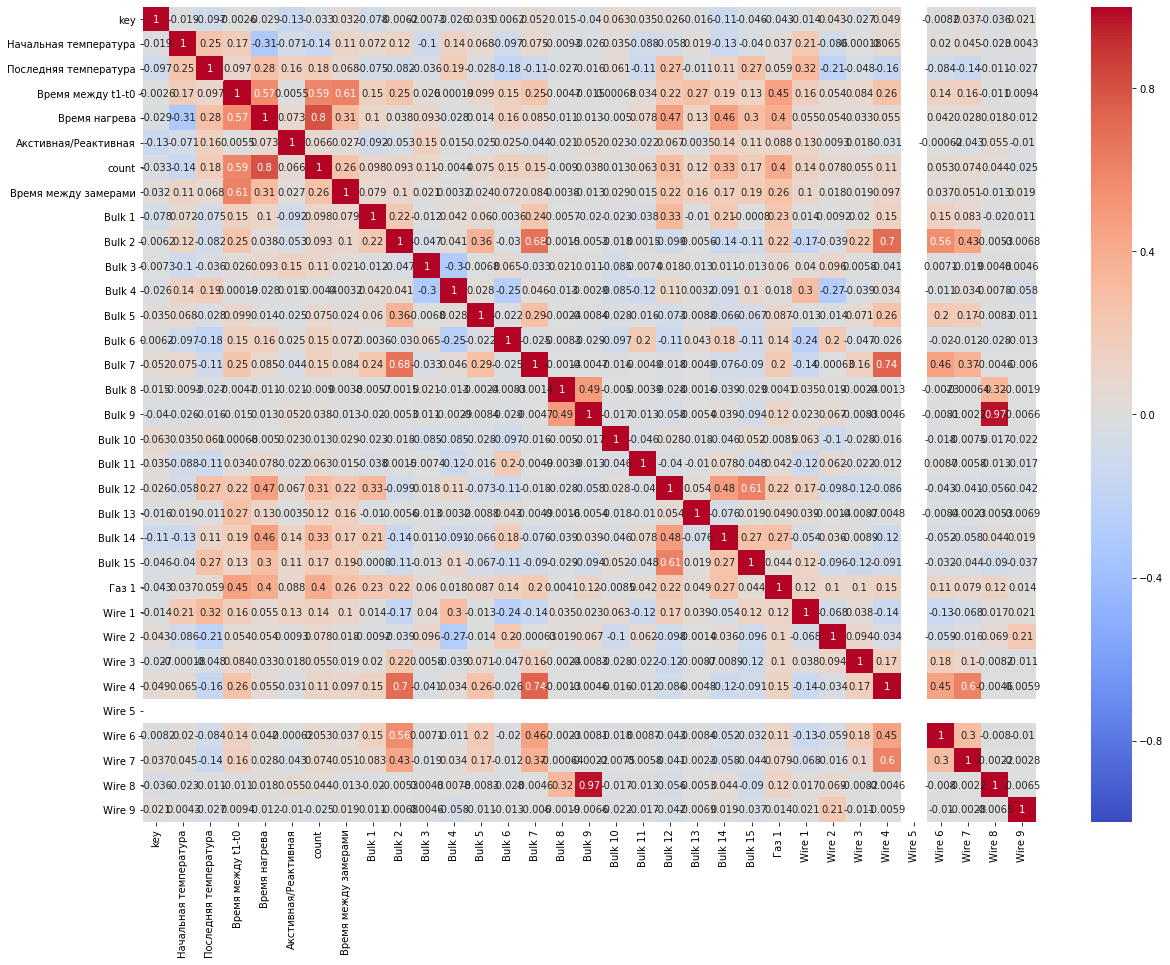

In [49]:
#pd.plotting.scatter_matrix(data_merge, figsize=(12, 12)) 
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Все что имеет коэф-т корреляции больше 0,7 уберем: count, bulk 2, bulk 7, wire 8. и заоодно wire 5 - ни на что не влияет.

In [50]:
data_merge.drop(['count', 'Bulk 2', 'Bulk 7', 'Wire 8', 'Wire 5'], axis='columns', inplace=True) 

In [51]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 28 columns):
key                      2329 non-null int64
Начальная температура    2329 non-null float64
Последняя температура    2329 non-null float64
Время между t1-t0        2329 non-null float64
Время нагрева            2329 non-null float64
Акстивная/Реактивная     2329 non-null float64
Время между замерами     2329 non-null float64
Bulk 1                   2329 non-null float64
Bulk 3                   2329 non-null float64
Bulk 4                   2329 non-null float64
Bulk 5                   2329 non-null float64
Bulk 6                   2329 non-null float64
Bulk 8                   2329 non-null float64
Bulk 9                   2329 non-null float64
Bulk 10                  2329 non-null float64
Bulk 11                  2329 non-null float64
Bulk 12                  2329 non-null float64
Bulk 13                  2329 non-null float64
Bulk 14                  2329 non-null float64
Bu

Содали таблицу с признаками. Для этого использовали feature engineering. Убрали лишнее и проверили корреляцию признаков.

## Создание моделей.

### Вариант №1

Попробуем создать простые модели на объедененных данных data_merge. Для определения успешности модели будем использовать метрику МАЕ (mean_absolute_error) - она позволит увидеть абсолютное расхождение предсказанных данных от фактических (т.е. мы увидим погрешность предсказания температуры) и чем ниже этот показатель, тем он для нас предпочтительнее. 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_absolute_error as mae

In [53]:
data_merge = data_merge.set_index('key') #сделаем №партии индексом

#### Разделение выборок

In [54]:
X = data_merge.drop(columns='Последняя температура')
y = data_merge['Последняя температура']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4221)
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=4211)

print('Valid shapes:')
print(X_train_valid.shape, X_valid.shape, y_train_valid.shape, y_valid.shape)
print('Train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Valid shapes:
(1309, 26) (437, 26) (1309,) (437,)
Train/test shapes:
(1746, 26) (583, 26) (1746,) (583,)


In [55]:
#функция обучения моделей и вывода метрики МАЕ
def model_result(model, X_train, y_train, X_test, y_test):
        
    model.fit(X_train, y_train)  
      
    y_pred = model.predict(X_test)  

    return mae(y_test, y_pred)

#### Модель Ridge

In [56]:
result_ridge=[]
for i in np.arange(0.1, 1.5, 0.25):
    model_ridge = Ridge(random_state=4221, alpha=i)
    result_ridge.append(model_result(model_ridge, X_train_valid, y_train_valid, X_valid, y_valid))
result_ridge

[6.283740057664276,
 6.286524982277007,
 6.287445972011795,
 6.2882283189392005,
 6.288878275372111,
 6.28950298399941]

In [57]:
pd.DataFrame(data=result_ridge,
             index=np.arange(0.1, 1.5, 0.25),
             columns=['score'])

,score
0.10,6.283740
0.35,6.286525
0.60,6.287446
0.85,6.288228
1.10,6.288878
1.35,6.289503


С увеличением значения alpha - ухудшается метрика, но шаг незначительный.

#### Модель LinearRegression

In [58]:
result=[]
model_linear = LinearRegression()
result.append(model_result(model_linear, X_train_valid, y_train_valid, X_valid, y_valid))

In [59]:
display(result)

[6.276505383400474]

Результат линейной регрессии немного лучше Ridge.

#### Модель RandomForestRegressor

In [60]:
result_forest=[]
for i in range(1, 101, 5):
    model_forest = RandomForestRegressor(random_state=4221, n_estimators=i, max_depth = 10, n_jobs=-1, max_features = "sqrt")
    result_forest.append(model_result(model_forest, X_train_valid, y_train_valid, X_valid, y_valid))
result_forest

[8.342049846342812,
 6.886142602097334,
 6.650388681882416,
 6.543394465420219,
 6.5304593431507865,
 6.525039910695387,
 6.539262560509853,
 6.5681663111247035,
 6.535671315099448,
 6.545671326212734,
 6.549258673082029,
 6.536143169842705,
 6.512594982120582,
 6.501373499410548,
 6.505504505426733,
 6.5167642016030864,
 6.511403792783895,
 6.511925338733135,
 6.5204362709666315,
 6.534390073038478]

In [61]:
pd.DataFrame(data=result_forest,
             index=range(1, 101, 5),
             columns=['score'])

,score
1,8.342050
6,6.886143
11,6.650389
16,6.543394
21,6.530459
26,6.525040
31,6.539263
36,6.568166
41,6.535671
46,6.545671


In [62]:
model = RandomForestRegressor(random_state=4221, n_estimators=66, max_depth = 10, n_jobs=-1, max_features = "sqrt")
model.fit(X_train, y_train)
mae(y_test, model.predict(X_test))

6.407437255023737

Лес решений показывает результаты немного хуже предыдущих моделей. МАЕ составило 6.50 для валидационной выборки и 6.41 для тестовой.

### Вариант №2

Подбираем лучшую модель через pipeline и GridSearchCV.

In [63]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold, TimeSeriesSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [91]:
pipe = Pipeline([
    ('imp', SimpleImputer(missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=4221))
])

params = [
    {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [RandomForestRegressor(n_estimators=150, random_state=4221)],
        'model__max_features': np.linspace(0.1, 1, 20)
    }, {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [LinearRegression()]
    }, {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [Ridge(random_state=4221)],
        'model__alpha': np.logspace(-3, 1, 10)
    }, {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [Lasso(random_state=4221)],
        'model__alpha': np.logspace(-3, 1, 10)
    }
]

In [92]:
kf = KFold(n_splits=3, random_state=4221)

grid = GridSearchCV(pipe,
                    param_grid=params,
                    cv=kf,
                    scoring='neg_mean_absolute_error', 
                    n_jobs=-1)
#при использовании GridSearchCV и cross_val_score метрика МАЕ работает только как 'neg_mean_absolute_error'
# - т.е значение получится с обратным знаком

In [93]:
grid.fit(X_train_valid, y_train_valid)

GridSearchCV(cv=KFold(n_splits=3, random_state=4221, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        RandomForestRegressor(

In [94]:
grid.best_params_, grid.best_score_

({'imp__strategy': 'mean',
  'model': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                        max_features=1.0, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=150,
                        n_jobs=None, oob_score=False, random_state=4221,
                        verbose=0, warm_start=False),
  'model__max_features': 1.0},
 -6.126396740514389)

Лучшая модель - Лес решений. Значение МАЕ по валидационной выборке = 6.13

In [95]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                        max_features=1.0, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=150,
                        n_jobs=None, oob_score=False, random_state=4221,
                        verbose=0, warm_start=False)
model.fit(X_train, y_train)
mae(y_test, model.predict(X_test))

5.928393367638646

Результат на тестовой выборке: МАЕ = 5.928

                       importance
feature                          
Начальная температура       0.203
Время нагрева               0.201
Wire 1                      0.088
Время между t1-t0           0.067
Bulk 6                      0.066
Акстивная/Реактивная        0.057
Газ 1                       0.049
Время между замерами        0.042
Wire 2                      0.040
Bulk 14                     0.040
Bulk 15                     0.037
Bulk 12                     0.037
Bulk 3                      0.018
Bulk 4                      0.017
Bulk 1                      0.010
Wire 6                      0.008
Wire 4                      0.006
Bulk 11                     0.004
Bulk 10                     0.003
Wire 3                      0.002
Bulk 5                      0.001
Wire 7                      0.001
Bulk 13                     0.000
Bulk 9                      0.000
Bulk 8                      0.000
Wire 9                      0.000


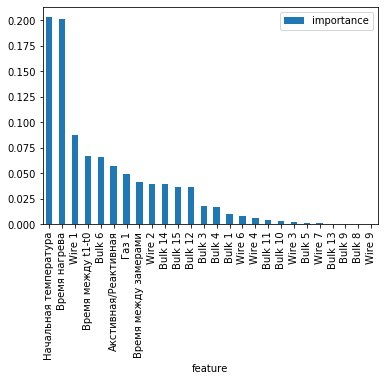

In [96]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)
importances.plot.bar()

Как видно из графика выше наибольше влияние на конечную температуру оказывают: Начальная температура, Время нагрева. Наименьшее влияние оказывают сыпучие (11, 10, 13, 5, 9, 8) и проволочные материалы (6, 4, 3, 7, 9)

## Вывод

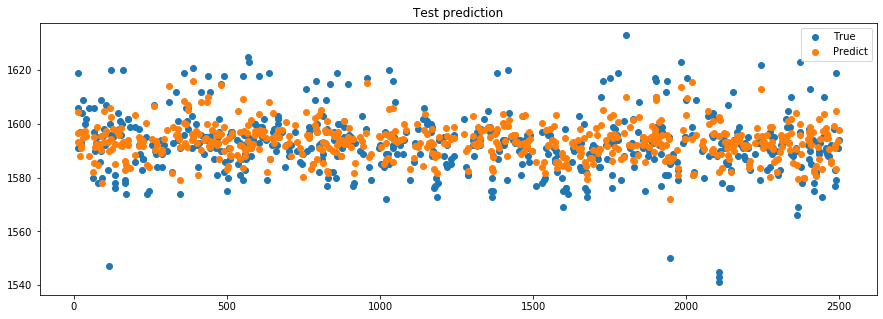

In [70]:
plt.figure(figsize=(15, 5))

plt.plot(y_test, 'o', label='True')
plt.plot(y_test.index, model.predict(X_test), 'o', label='Predict')

plt.title('Test prediction')
plt.legend()
plt.show()

Как видно из графика. Модель предсказывет температуру довольно близко к факту, хотя есть и некоторые расхождения. Есть значения факта с высокой температурой или наоборот низкой, а предсказания показывают средний результат. Возможно это связано с аномалиями в данных.

В среднем модель ошибается на 5.9 градуса (меньше 0,4% от средней температуры)

Данная модель может быть использована для предсказания конечной температуры сплава после всех манипуляций с ним с погрешностью до 6 градусов цельсия. Модель можно использовать для поиска оптимальных конфигураций начального нагрева, мощности и времени нагрева сплава для уменьшения использования электроэнергии.